# **Project 3D Velodyne points to 2D camera Image** 
***

## Dataset
[KITTI 2011_09_26_drive_0005 dataset](http://www.cvlibs.net/datasets/kitti/raw_data.php?type=city)  
In this code, rectified image is used.

refer to [KITTI Dataset Paper](http://www.cvlibs.net/publications/Geiger2013IJRR.pdf) for the details of data measurement environment

## Objective

Project Velodyne points(model : HDL-64E) to 2D camera Image.  
  

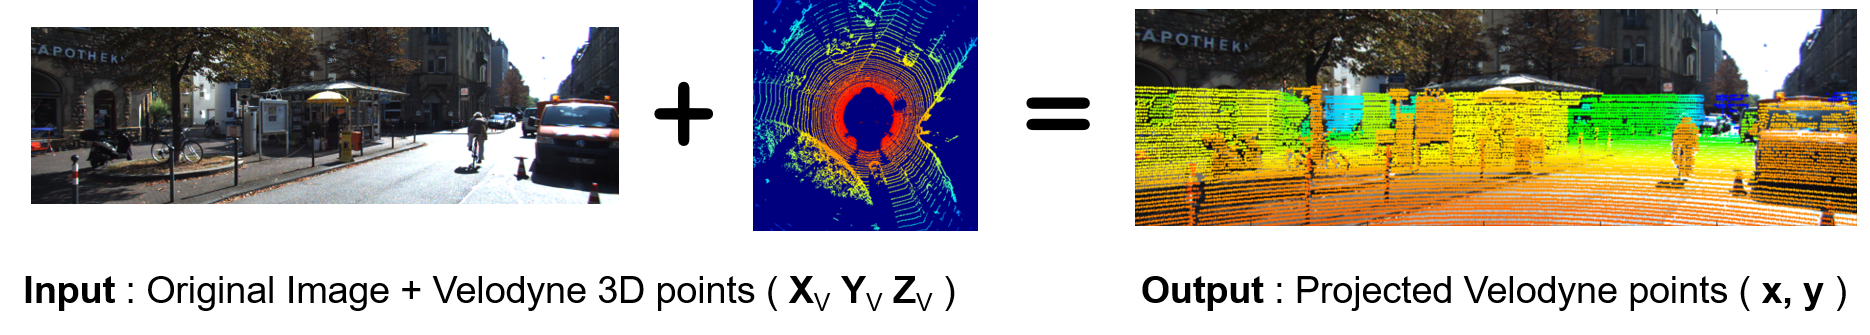

In [1]:
from IPython.display import Image
Image(filename='./objective.png')

# Process
  
***  

For converting coordinate systems, there are several steps.  
To help your understanding, I made a simple slide. The codes below are proceeding as these steps.  
  
  

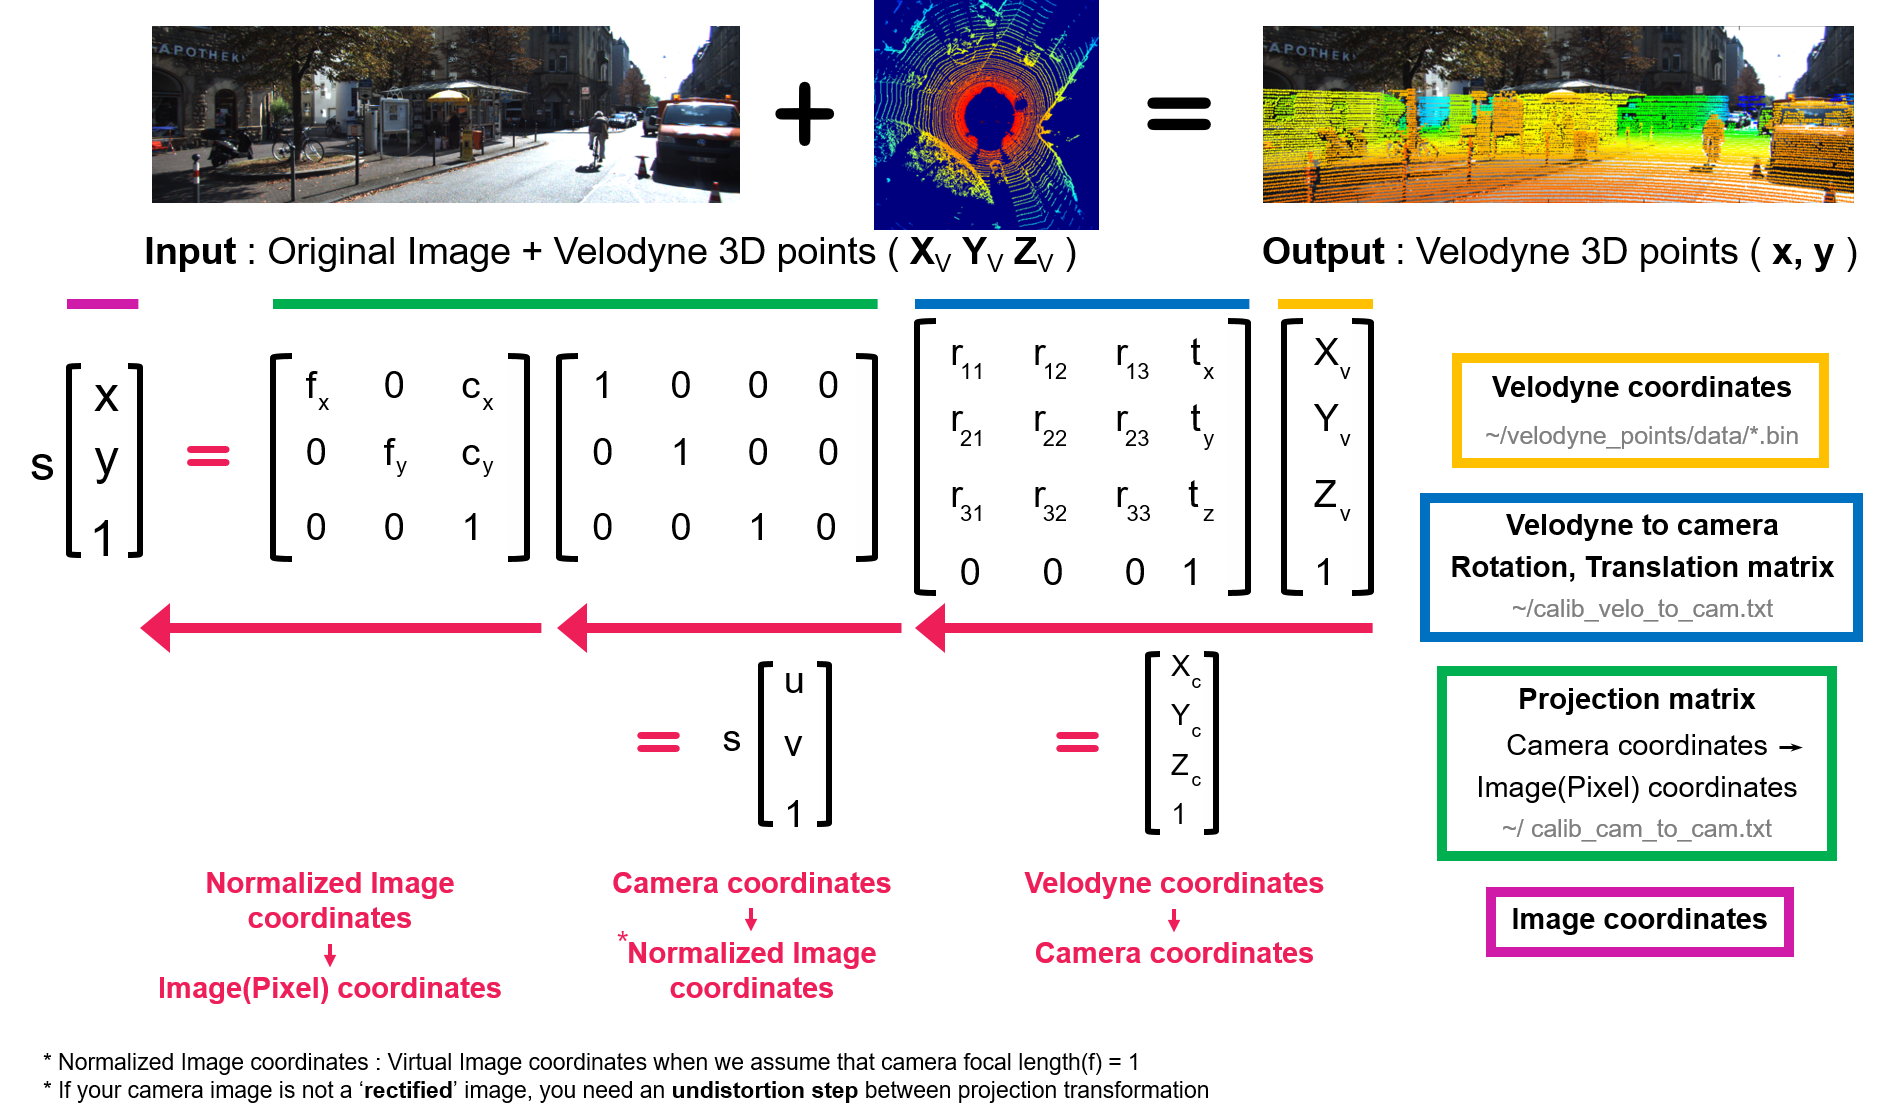

In [2]:
Image(filename='./process.png')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from kitti_foundation import Kitti, Kitti_util
%matplotlib inline

velo_path = './velodyne_points/data'

velo = Kitti(frame=89, velo_path=velo_path)
frame = velo.velo_file

print(frame.shape)

(123749, 3)


(375, 1242, 3)


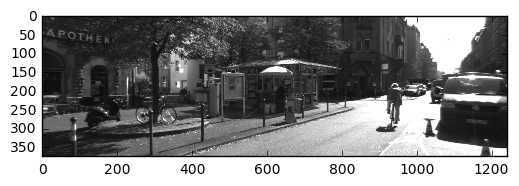

In [4]:
import matplotlib.image as mpimg
import cv2

#read left camera image
image_type = 'gray'  # 'gray' or 'color' image
mode = '00' if image_type == 'gray' else '02'  # image_00 = 'graye image' , image_02 = 'color image'

image_path = 'image_' + mode + '/data'

# print frame 89 camera image
camera = Kitti(frame=89,camera_path=image_path)
image = camera.camera_file

plt.imshow(image)
print(image.shape)

In [5]:
def print_projection_cv2(points, color, image):
    """ project converted velodyne points into camera image """
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    for i in range(points.shape[1]):
        cv2.circle(hsv_image, (np.int32(points[0][i]),np.int32(points[1][i])),2, (int(color[i]),255,255),-1)

    return cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

def print_projection_plt(points, color, image):
    """ project converted velodyne points into camera image """
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    for i in range(points.shape[1]):
        cv2.circle(hsv_image, (np.int32(points[0][i]),np.int32(points[1][i])),2, (int(color[i]),255,255),-1)

    return cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

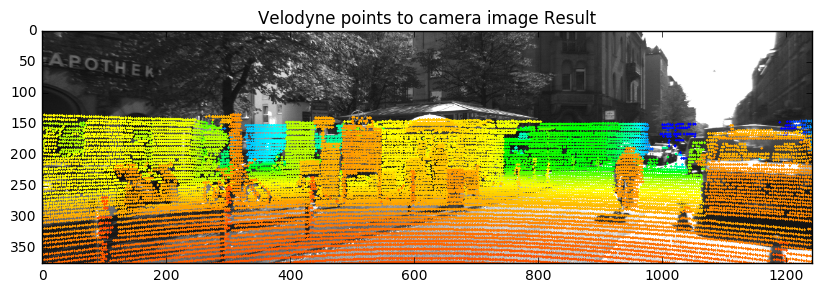

In [6]:
""" save one frame about projecting velodyne points into camera image """
image_type = 'gray'  # 'gray' or 'color' image
mode = '00' if image_type == 'gray' else '02'  # image_00 = 'graye image' , image_02 = 'color image'

image_path = 'image_' + mode + '/data'
velo_path = './velodyne_points/data'

v_fov, h_fov = (-24.9, 2.0), (-90, 90)

v2c_filepath = './calib_velo_to_cam.txt'
c2c_filepath = './calib_cam_to_cam.txt'

res = Kitti_util(frame=89, camera_path=image_path, velo_path=velo_path, \
                v2c_path=v2c_filepath, c2c_path=c2c_filepath)

img, pnt, c_ = res.velo_projection_frame(v_fov=v_fov, h_fov=h_fov)

result = print_projection_plt(pnt, c_, img)

# display result image
plt.subplots(1,1, figsize = (13,3) )
plt.title("Velodyne points to camera image Result")
plt.imshow(result)


## Save Video

In [7]:
""" save video about projecting velodyne points into camera image """
image_type = 'gray'  # 'gray' or 'color' image
mode = '00' if image_type == 'gray' else '02'  # image_00 = 'graye image' , image_02 = 'color image'

image_path = 'image_' + mode + '/data'

velo_path = './velodyne_points/data'
v_fov, h_fov = (-24.9, 2.0), (-90, 90)

v2c_filepath = './calib_velo_to_cam.txt'
c2c_filepath = './calib_cam_to_cam.txt'

temp = Kitti(frame=0, camera_path=image_path)
img = temp.camera_file
size = (img.shape[1], img.shape[0])

""" save result video """
fourcc = cv2.VideoWriter_fourcc(*'XVID')
vid = cv2.VideoWriter('projection.avi', fourcc, 25.0, size)
test = Kitti_util(frame='all', camera_path=image_path, velo_path=velo_path, \
                  v2c_path=v2c_filepath, c2c_path=c2c_filepath)

res = test.velo_projection(v_fov=v_fov, h_fov=h_fov)

for frame, point, cc in res:
    image = print_projection_cv2(point, cc, frame)
    vid.write(image)

print('video saved')
vid.release()

video saved


## Display Result Video

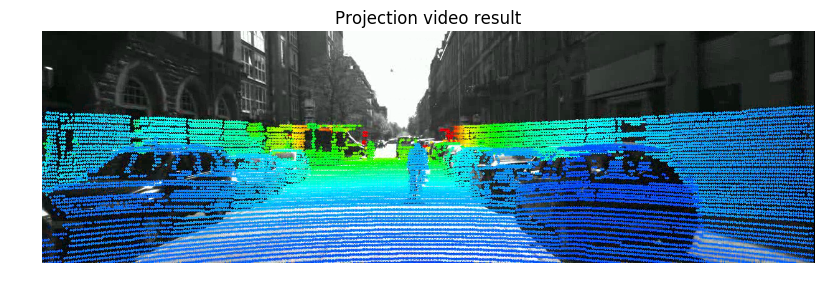

In [8]:
from IPython.display import clear_output

""" display video """
vid = cv2.VideoCapture("./projection.avi")

while(True):
    ret, frame = vid.read()
    if not ret:
        vid.release()
        break
    fig = plt.figure(figsize=(12,3))
    
    plt.title("Projection video result")
    plt.axis('off')
    plt.imshow(frame)
    plt.show()
    # clear current frame for next frame
    clear_output(wait=True)

vid.release()